# Bitcoin prices and the shape of the globe

[Why Bitcoin price is increasing amid Russia-Ukraine war](https://www.financialexpress.com/digital-currency/why-bitcoin-price-is-increasing-amid-russia-ukraine-war/2447933/)

**¿Which could be the bitcoin price next week?**


# Homework 1

* Related with the nature of the data, which conditions should meet matrices $A$ and $b$ to be solvable from the least squares perspective.

* Use a least squares for non-linear models adjust the bitcoin price and perform a prediction using the model to determine the future daily price a week ahead, compare with the actual values.

* Use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silver and gold, during the last year.

* Solve the [point set registration problem](https://en.wikipedia.org/wiki/Point-set_registration). Hint (check: S. Umeyama, Least-Squares Estimation of Transformation Parameters Between Two Point Patterns, IEEE Trans. Pattern Anal. Mach. Intell., vol. 13, no. 4, 1991). Construct a GUI to test. (**Additional points**)

# Question n°1

### Related with the nature of the data, which conditions should meet matrices $A$ and $b$ to be solvable from the least squares perspective:

Between the conditions that the matrices A and b should meet to be solvable from the least squares perspective are the following. First of all, A should be invertible. This wouldn't happen if for example, some rows of A were linearly dependent. Also, A and b must have the same number of rows, so that they're able to be able to be substracted.

# Question n°2

### Use a least squares for non-linear models adjust the bitcoin price and perform a prediction using the model to determine the future daily price a week ahead, compare with the actual values:

As the Bitcoin's data seems to perpetually go up and down, trying to model this by a trigonometric funtion is what comes to mind.
Nevertheless, these functions can be approximated by their Taylor's series, which are easier to implement computationally. We have $sin(x) = \sum_{i=0}^{\inf} \frac{(-1)^i x^{2i+1}}{(2i+1)!} = \frac{x}{1!} - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} ...$ For added precision we could add a constant, which would then give us:\
$sin(x) + c = c + \frac{x}{1!} - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} ...$\
So, all we have to do is fill the first column of A with 1s, to take the constant into account, and then fill each column of A with the $x_i$s calculated to the row's corresponding power and divided by the factorial of that same power.
The algorithm we had inicially should then solve the ecuation properly.

In [31]:
using CSV
using DataFrames

dataBitcoin = CSV.read("data/Bitcoin.csv",DataFrame);
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);

Least squares formulation:

$\tilde{x} = \mbox{arg min}_{x} \| Ax - b \|_2^2$

In [32]:
N = size(dataBitcoin.PriceFloat,1);
b = Array(dataBitcoin.PriceFloat);
b = reverse(b)


precision = 6
A = ones(N,1);
for i in 1:precision
    A = [A [((-1)^(i+1))* j^(2*i -1)/factorial(2*i -1) for j in 1:N]];
end

#println(A)
println(b)

[43833.9, 44038.2, 44388.9, 43521.0, 42388.4, 42205.2, 42061.1, 42550.3, 44544.4, 43883.6, 40552.8, 40000.1, 40090.3, 38355.0, 37017.7, 38248.2, 37224.6, 38339.2, 39209.6, 39115.5, 37689.1, 43188.2, 44420.3, 43912.8, 42463.0, 39142.7, 39395.8, 38403.1, 38014.8]


Least squares solution:

$\tilde{x} = \mbox{arg min}_{x} J(\mathbf x) = \mbox{arg min}_{x} \| Ax - b \|_2^2$

$J(x) = \| Ax - b\|_2^2 = ( Ax - b )^T ( Ax - b ) = (A x)^T (A x) - (A x)^T b - b^T (A x) + b^T b$

$J(x) = x^T A^T Ax - 2 x^T A^T b + b^T b$

Now **minimizing** $J(x)$ w.r.t $x$:

$\frac{\partial J(x)}{\partial  x} = - 2 A^T b + 2 A^T A x = 0$

We obtain the [normal equations](https://en.wikipedia.org/wiki/Linear_least_squares#Derivation_of_the_normal_equations):

$A^T A x = A^T b$

The solution:

$x = (A^T A)^{-1} A^T  b = A^+ b$

With $A^+ = (A^T A)^{-1} A^T$ the Moore-Penrose pseudoinverse of $A$.

* Using the unique least squares approximate solution of overdetermined equations:

$(A^T A)^{-1} A^T$y

In [33]:
transpose(A)*A
beta1 = inv(transpose(A)*A)*(transpose(A)*b)

using LinearAlgebra

xhat2 = pinv(A)*b

7-element Vector{Float64}:
 45986.344465306276
  -702.2922504889527
    -8.969309861820427
    -0.13197003636324167
     0.004078415519036266
     0.27963536586689697
   -20.553857275728845

* Solving the normal equations:

$A^T A x = A^T b$

In [34]:
x = transpose(A)*A \ transpose(A)*b

7-element Vector{Float64}:
 45986.34446530981
  -702.2922504890502
    -8.96930986182182
    -0.13197003636267057
     0.004078415518846354
     0.27963536586706605
   -20.55385727572603

* Using the QR solution:

In [35]:
using LinearAlgebra
xhat3 = A\b

7-element Vector{Float64}:
 45986.344465308524
  -702.2922504889215
    -8.969309861820554
    -0.13197003636265375
     0.00407841551884633
     0.27963536586707394
   -20.55385727572727

* There are cases where we want to obtain and store the matrices Q and R from the factorization:

In [36]:
qrA = qr(A);                    # QR decomposition
xhat4 = qrA\b

7-element Vector{Float64}:
 45986.344465308546
  -702.2922504889241
    -8.969309861820623
    -0.13197003636265509
     0.004078415518846306
     0.2796353658670713
   -20.553857275727268

We get the following model, which as we can see, follows the data quite faithfully.

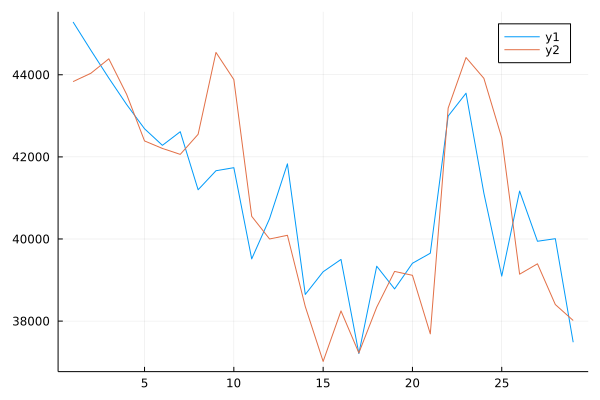

In [37]:
using Plots

xhat = xhat4
pred = xhat[1]*A[:,1]

for k in 2:precision+1
    pred = pred + xhat[k]*A[:,k];
end


plot((1:N),pred)
plot!((1:N),b)


Nevertheless, it seems as it doesn't predict as well the values of the next seven days.

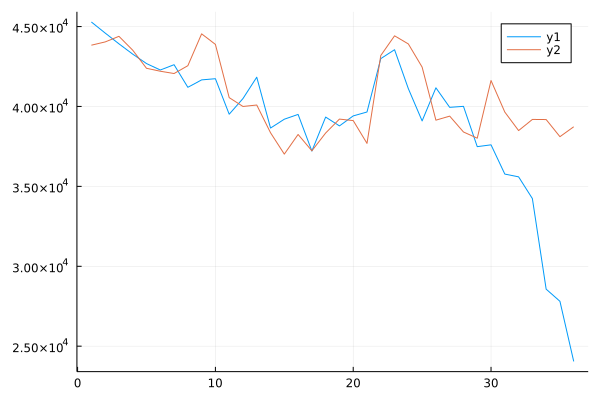

In [38]:
using Plots

dataBitcoin2 = CSV.read("data/Bitcoin+7D.csv",DataFrame);
dataBitcoin2.Price .= replace.(dataBitcoin2.Price, "," => "");
dataBitcoin2.PriceFloat = parse.(Float64, dataBitcoin2.Price);

N2 = size(dataBitcoin2.PriceFloat,1);
b2 = Array(dataBitcoin2.PriceFloat);
b2 = reverse(b2)


A2 = ones(N2,1);
for i in 1:precision
    A2 = [A2 [((-1)^(i+1))*j^(2*i -1)/factorial(2*i -1) for j in 1:N2]];
end


xhat = xhat4
pred = xhat[1]*A2[:,1] 

for k in 2:precision+1
    pred = pred + xhat[k]*A2[:,k];
end


plot((1:N2),pred)
plot!((1:N2),b2)

# Question n°3

### Use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silver and gold, during the last year.

For this set of questions we'll make a model that tries to follow the difference in fluctuation between the Bitcoin and the other three sets of data. Then we'll be able to see how their prices differ over time. As the three comodities also seem to go up and down, the algorithm from the last question should be fitting to model this.

#### For Bitcoin and Oil we have:

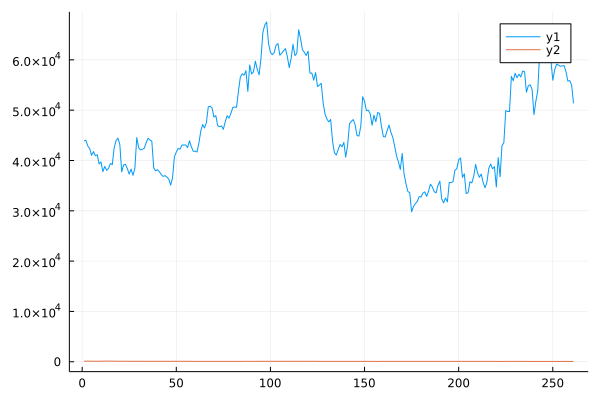

In [39]:
using Plots
using CSV
using DataFrames

dataBit = CSV.read("data/BitcoinYear.csv",DataFrame);
dataBit.Price .= replace.(dataBit.Price, "," => "");
dataBit.PriceFloat = parse.(Float64, dataBit.Price);

NBit = size(dataBit.PriceFloat,1);
bBit = Array(dataBit.PriceFloat)
bBit= reverse(bBit)

plot((1:NBit),bBit)

dataOil = CSV.read("data/OilYear.csv",DataFrame);
#dataOil.Price .= replace.(dataOil.Price, "," => "");
#dataOil.PriceFloat = parse.(Float64, dataOil.Price);

NOil = size(dataOil.Price,1);
bOil = Array(dataOil.Price);
bOil = reverse(bOil)
plot((1:NOil),bBit)
plot!((1:NOil),bOil)



We can see in the graph above that the difference in scale between the two sets of values is too significant. To solve this, we'll multiply bOil's values by a scalar, so that they can be around the same magnitude.

In [40]:

precision = 6
A = ones(NOil,1);
for i in 1:precision
    A = [A [((-1)^(i+1))* j^(2*i -1)/factorial(2*i -1) for j in 1:NOil]];
end

b = ones(NOil,1)
for i in 1:NOil   
    b[i] = bBit[i] - 100*bOil[i]
end

In [41]:
transpose(A)*A
beta1 = inv(transpose(A)*A)*(transpose(A)*b)

using LinearAlgebra

xhat2 = pinv(A)*b

7×1 Matrix{Float64}:
 34517.299684147416
    36.056265934495045
     0.0006012786652379448
    -4.654402248152887e-5
    -0.003406153965588266
     0.09841731034075929
    21.659134698938814

In [42]:
x = transpose(A)*A \ transpose(A)*b

7×1 Matrix{Float64}:
 34517.29968412623
    36.05626593461035
     0.0006012786652285209
    -4.654402248732038e-5
    -0.0034061539655657006
     0.09841731034074935
    21.65913469893875

In [43]:
using LinearAlgebra
xhat3 = A\b

7×1 Matrix{Float64}:
 34517.29968412629
    36.05626593460994
     0.000601278665228489
    -4.6544022487321535e-5
    -0.003406153965565656
     0.09841731034074984
    21.659134698938754

In [44]:
qrA = qr(A);                    # QR decomposition
xhat4 = qrA\b

7×1 Matrix{Float64}:
 34517.29968412628
    36.05626593460993
     0.0006012786652284737
    -4.6544022487320715e-5
    -0.0034061539655656807
     0.0984173103407494
    21.659134698938754

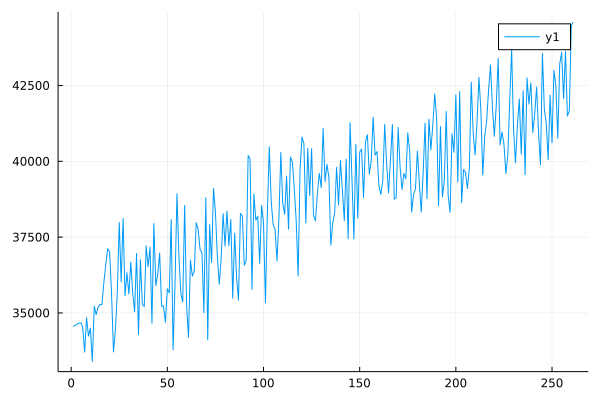

In [45]:
using Plots

xhat = xhat4
pred = xhat[1]*A[:,1]

for k in 2:precision+1
    pred = pred + xhat[k]*A[:,k];
end


plot((1:NOil),pred)
#plot!((1:NOil),b)

We get very abrupt ups and downs, this could mean that when Bitcoin drops gold goes ups, and viceversa, in a cicle. We can also see that the difference between the two seems to be growing.

#### For Bitcoin and Gold:

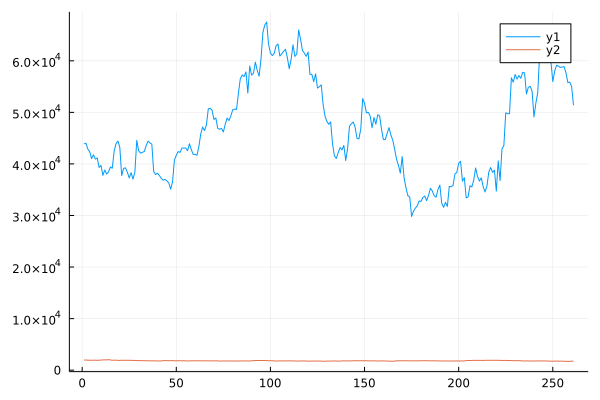

In [46]:
using Plots
using CSV
using DataFrames

dataBit = CSV.read("data/BitcoinYear.csv",DataFrame);
dataBit.Price .= replace.(dataBit.Price, "," => "");
dataBit.PriceFloat = parse.(Float64, dataBit.Price);

NBit = size(dataBit.PriceFloat,1);
bBit = Array(dataBit.PriceFloat)
bBit= reverse(bBit)

plot((1:NBit),bBit)

dataGold = CSV.read("data/GoldYear.csv",DataFrame);
dataGold.Price .= replace.(dataGold.Price, "," => "");
dataGold.PriceFloat = parse.(Float64, dataGold.Price);

NGold = size(dataGold.PriceFloat,1);
bGold = Array(dataGold.PriceFloat);
bGold = reverse(bGold)
plot((1:NGold),bBit)
plot!((1:NGold),bGold)


Again, we see that the difference in scale is too large. We'll have to solve this the same way we did before.

In [47]:
precision = 6
A = ones(NGold,1);
for i in 1:precision
    A = [A [((-1)^(i+1))* j^(2*i -1)/factorial(2*i -1) for j in 1:NGold]];
end

b = ones(NOil,1)
for i in 1:NOil   
    b[i] = bBit[i] - 30*bGold[i]
end

In [48]:
transpose(A)*A
beta1 = inv(transpose(A)*A)*(transpose(A)*b)

using LinearAlgebra

xhat2 = pinv(A)*b

7×1 Matrix{Float64}:
 -11992.767213892246
     38.29581438206577
      0.0012866905572729466
     -5.3679559061053486e-5
     -0.003779457751114633
      0.10287346399960354
     22.455918630441943

In [49]:
x = transpose(A)*A \ transpose(A)*b

7×1 Matrix{Float64}:
 -11992.767213914754
     38.295814382188496
      0.0012866905572794553
     -5.367955905768151e-5
     -0.003779457751112476
      0.1028734639995915
     22.45591863044192

In [50]:
using LinearAlgebra
xhat3 = A\b

7×1 Matrix{Float64}:
 -11992.767213914756
     38.29581438218829
      0.0012866905572794368
     -5.367955905768104e-5
     -0.0037794577511124907
      0.10287346399959131
     22.455918630441953

In [51]:
qrA = qr(A);                    # QR decomposition
xhat4 = qrA\b

7×1 Matrix{Float64}:
 -11992.767213914756
     38.295814382188276
      0.0012866905572794388
     -5.3679559057681387e-5
     -0.00377945775111248
      0.10287346399959152
     22.455918630441925

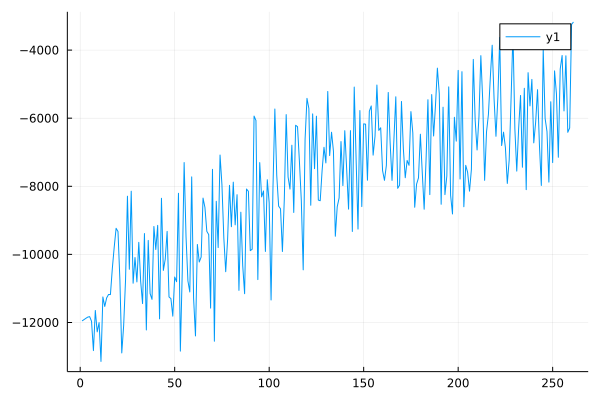

In [52]:
using Plots

xhat = xhat4
pred = xhat[1]*A[:,1]

for k in 2:precision+1
    pred = pred + xhat[k]*A[:,k];
end


plot((1:NGold),pred)
#plot!((1:NOil),b)

We get a similar graph to the Gold's, again with abrupt ups and downs and going higher. This time though, the values are approaching 0, which means the difference in fluctuation between Bitcoin and Gold is ever shrinking.

#### For Bitcoin and Silver:

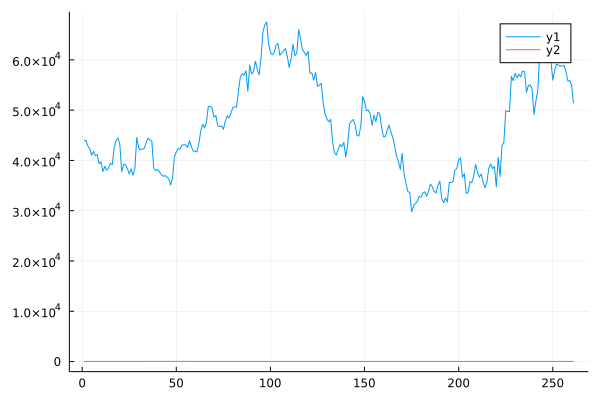

In [53]:
using Plots
using CSV
using DataFrames

dataBit = CSV.read("data/BitcoinYear.csv",DataFrame);
dataBit.Price .= replace.(dataBit.Price, "," => "");
dataBit.PriceFloat = parse.(Float64, dataBit.Price);

NBit = size(dataBit.PriceFloat,1);
bBit = Array(dataBit.PriceFloat)
bBit= reverse(bBit)

plot((1:NBit),bBit)

dataSilv = CSV.read("data/SilverYear.csv",DataFrame);
#dataSilv.Price .= replace.(dataSilv.Price, "," => "");
#dataSilv.PriceFloat = parse.(Float64, dataSilv.Price);

NSilv = size(dataSilv.Price,1);
bSilv = Array(dataSilv.Price);
bSliv = reverse(bSilv)
plot((1:NSilv),bBit)
plot!((1:NSilv),bSilv)

In [54]:
precision = 6
A = ones(NSilv,1);
for i in 1:precision
    A = [A [((-1)^(i+1))* j^(2*i -1)/factorial(2*i -1) for j in 1:NSilv]];
end

b = ones(NSilv,1)
for i in 1:NSilv   
    b[i] = bBit[i] - 1500*bSilv[i]
end

In [55]:
transpose(A)*A
beta1 = inv(transpose(A)*A)*(transpose(A)*b)

using LinearAlgebra

xhat2 = pinv(A)*b

7×1 Matrix{Float64}:
 3431.180338859159
   67.3046461305122
    0.003193921624309045
   -6.276387367009376e-5
   -0.0033252907895372358
    0.050418945054763846
   21.541899931166128

In [56]:
x = transpose(A)*A \ transpose(A)*b

7×1 Matrix{Float64}:
 3431.180338819593
   67.30464613072779
    0.0031939216243122024
   -6.276387366891135e-5
   -0.0033252907895223545
    0.050418945054742474
   21.541899931166103

In [57]:
using LinearAlgebra
xhat3 = A\b

7×1 Matrix{Float64}:
 3431.18033881963
   67.30464613072729
    0.0031939216243121594
   -6.276387366891146e-5
   -0.00332529078952235
    0.05041894505474221
   21.541899931166103

In [58]:
qrA = qr(A);                    # QR decomposition
xhat4 = qrA\b

7×1 Matrix{Float64}:
 3431.180338819612
   67.30464613072736
    0.0031939216243121625
   -6.276387366891141e-5
   -0.003325290789522349
    0.050418945054742204
   21.541899931166114

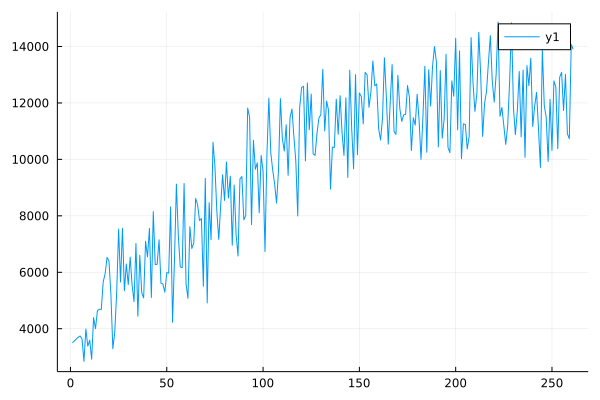

In [59]:
using Plots

xhat = xhat4
pred = xhat[1]*A[:,1]

for k in 2:precision+1
    pred = pred + xhat[k]*A[:,k];
end


plot((1:NSilv),pred)
#plot!((1:NOil),b)

In this final graph we see something new. The difference in fluctiation appeared to be growing "constantly", but around 100 days ago it started to flatten. Appart from that we could make similar interpretations to the previous ones.